# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Import funciton that converts Unix Time Stamp into convencional date format
from get_date_from_unix import get_date_from_unix

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [4]:
#Initialize variables for the for loop
count = 0
city_main_dict = dict()


#Text
print('Beginning Data Retrieval\n-----------------------------')

for city in cities:
    #Initialize temporary variables that will hold the data
    city_dict = dict()
    
    
    #Exception handling
    try:
        #output text to inform user which record is being processed
        print('Processing Record ' + str(count+1) +  '| '+city + '|', end = " ")
        
        #request to Openweather API - Conversion into Json object, storing it in temporary dictionary
        temp_city = requests.get(query_url+city).json()
        
        #Storing relevant data into temporary dictionary
        city_dict['City'] = city
        city_dict['Cloudiness (%)'] = list(temp_city['clouds'].values())[0]
        city_dict['Country'] = temp_city['sys']['country']
        city_dict['Date'] = get_date_from_unix(temp_city['dt'])
        city_dict['Humidity (%)'] = temp_city['main']['humidity']
        city_dict['Latitude'] = temp_city['coord']['lat']
        city_dict['Longitude'] = temp_city['coord']['lon']
        city_dict['Max Temperature (°F)'] = temp_city['main']['temp_max']
        city_dict['Wind Speed(mph)'] = temp_city['wind']['speed']
        city_main_dict[count] = city_dict
                
        #update counter for loop
        count += 1
        print('Record ' + str(count) +  ' successfully processed.')
        #Allows a wait time of 0.5 seconds in between loop iterations because of the restriction in number of requests allowed by the Open Weather API
        time.sleep(0.5)
    except:
        
        print(f'{city} not found or there was a problem with record #{count+1}. Skipping...')
        
        #update counter for loop
        count += 1
        
        #Allows a wait time of 0.5 seconds in between loop iterations because of the restriction in number of requests allowed by the Open Weather API
        time.sleep(0.5)
        
        

print('-----------------------------\nData Retrieval Completed')

Beginning Data Retrieval
-----------------------------
Processing Record 1| salamanca| Record 1 successfully processed.
Processing Record 2| alotau| alotau not found or there was a problem with record #2. Skipping...
Processing Record 3| adrar| Record 3 successfully processed.
Processing Record 4| dikson| Record 4 successfully processed.
Processing Record 5| butaritari| Record 5 successfully processed.
Processing Record 6| mataura| Record 6 successfully processed.
Processing Record 7| barrow| Record 7 successfully processed.
Processing Record 8| norman wells| Record 8 successfully processed.
Processing Record 9| leningradskiy| Record 9 successfully processed.
Processing Record 10| hermanus| Record 10 successfully processed.
Processing Record 11| pokrovsk| Record 11 successfully processed.
Processing Record 12| mahebourg| Record 12 successfully processed.
Processing Record 13| porto novo| Record 13 successfully processed.
Processing Record 14| ulladulla| Record 14 successfully processed

Processing Record 117| vila velha| Record 117 successfully processed.
Processing Record 118| inuvik| Record 118 successfully processed.
Processing Record 119| santa maria| Record 119 successfully processed.
Processing Record 120| sangar| Record 120 successfully processed.
Processing Record 121| panama city| Record 121 successfully processed.
Processing Record 122| belushya guba| belushya guba not found or there was a problem with record #122. Skipping...
Processing Record 123| fayaoue| Record 123 successfully processed.
Processing Record 124| buala| Record 124 successfully processed.
Processing Record 125| saint-philippe| Record 125 successfully processed.
Processing Record 126| ituiutaba| Record 126 successfully processed.
Processing Record 127| cape town| Record 127 successfully processed.
Processing Record 128| warqla| warqla not found or there was a problem with record #128. Skipping...
Processing Record 129| kavieng| Record 129 successfully processed.
Processing Record 130| half m

Processing Record 230| bandipur| Record 230 successfully processed.
Processing Record 231| okato| Record 231 successfully processed.
Processing Record 232| jaramana| jaramana not found or there was a problem with record #232. Skipping...
Processing Record 233| bilibino| Record 233 successfully processed.
Processing Record 234| calvinia| Record 234 successfully processed.
Processing Record 235| darhan| Record 235 successfully processed.
Processing Record 236| ilulissat| Record 236 successfully processed.
Processing Record 237| andenes| andenes not found or there was a problem with record #237. Skipping...
Processing Record 238| tunduru| tunduru not found or there was a problem with record #238. Skipping...
Processing Record 239| goundam| Record 239 successfully processed.
Processing Record 240| naze| Record 240 successfully processed.
Processing Record 241| bathsheba| Record 241 successfully processed.
Processing Record 242| khatanga| Record 242 successfully processed.
Processing Record

Processing Record 342| haines junction| Record 342 successfully processed.
Processing Record 343| brewster| Record 343 successfully processed.
Processing Record 344| broken hill| Record 344 successfully processed.
Processing Record 345| vostok| Record 345 successfully processed.
Processing Record 346| svetlyy| svetlyy not found or there was a problem with record #346. Skipping...
Processing Record 347| mkuranga| Record 347 successfully processed.
Processing Record 348| taoudenni| Record 348 successfully processed.
Processing Record 349| khalkhal| Record 349 successfully processed.
Processing Record 350| fougamou| Record 350 successfully processed.
Processing Record 351| yenagoa| Record 351 successfully processed.
Processing Record 352| kutum| Record 352 successfully processed.
Processing Record 353| yerofey pavlovich| Record 353 successfully processed.
Processing Record 354| mugur-aksy| Record 354 successfully processed.
Processing Record 355| sulangan| Record 355 successfully processe

Processing Record 456| port blair| Record 456 successfully processed.
Processing Record 457| husavik| Record 457 successfully processed.
Processing Record 458| kerema| Record 458 successfully processed.
Processing Record 459| cravo norte| Record 459 successfully processed.
Processing Record 460| howard springs| Record 460 successfully processed.
Processing Record 461| baia de arama| Record 461 successfully processed.
Processing Record 462| ngukurr| ngukurr not found or there was a problem with record #462. Skipping...
Processing Record 463| vama| Record 463 successfully processed.
Processing Record 464| lolua| lolua not found or there was a problem with record #464. Skipping...
Processing Record 465| columbia| Record 465 successfully processed.
Processing Record 466| nome| Record 466 successfully processed.
Processing Record 467| kloulklubed| Record 467 successfully processed.
Processing Record 468| fernie| Record 468 successfully processed.
Processing Record 469| ketchenery| ketchener

Processing Record 571| kilindoni| Record 571 successfully processed.
Processing Record 572| atar| Record 572 successfully processed.
Processing Record 573| nishihara| Record 573 successfully processed.
Processing Record 574| sinnamary| Record 574 successfully processed.
Processing Record 575| kindu| Record 575 successfully processed.
Processing Record 576| chicama| Record 576 successfully processed.
Processing Record 577| swellendam| Record 577 successfully processed.
Processing Record 578| barabai| Record 578 successfully processed.
Processing Record 579| madang| Record 579 successfully processed.
Processing Record 580| hay river| Record 580 successfully processed.
Processing Record 581| barahona| Record 581 successfully processed.
Processing Record 582| bonfim| Record 582 successfully processed.
Processing Record 583| harper| Record 583 successfully processed.
Processing Record 584| mazatlan| Record 584 successfully processed.
Processing Record 585| bairiki| bairiki not found or ther

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Convert retrieved data into a dataframe
df = pd.DataFrame(city_main_dict).T

#Convert numerical information stored as string data into actual numerical data into the dataframe
ser = list(df.columns)
ser.pop(0)
ser.pop(1)
ser.pop(1)
ser

for column in ser:
    df[column] = pd.to_numeric(df[column])

df.head(30)

,City,Cloudiness (%),Country,Date,Humidity (%),Latitude,Longitude,Max Temperature (°F),Wind Speed(mph)
0,salamanca,40,MX,2019-Jul-18 16:31:30,64,20.57,-101.19,72.00,5.06
2,adrar,84,DZ,2019-Jul-18 16:31:31,6,27.87,-0.29,120.20,17.22
3,dikson,36,RU,2019-Jul-18 16:31:32,67,73.51,80.55,50.27,11.45
4,butaritari,67,KI,2019-Jul-18 16:31:32,72,3.07,172.79,82.67,5.32
5,mataura,100,NZ,2019-Jul-18 16:31:33,92,-46.19,168.86,39.99,2.73
6,barrow,100,AR,2019-Jul-18 16:31:34,33,-38.31,-60.23,56.75,7.07
7,norman wells,20,CA,2019-Jul-18 16:31:35,52,65.28,-126.83,66.20,10.29
8,leningradskiy,97,RU,2019-Jul-18 16:31:35,87,69.38,178.42,34.61,15.46
9,hermanus,0,ZA,2019-Jul-18 16:29:06,59,-34.42,19.24,66.00,15.99
10,pokrovsk,46,RU,2019-Jul-18 16:31:37,81,61.48,129.14,44.51,2.77


In [6]:
#Confirm the data type on the columns of interest (Cloudiness, Humidity, Latitude, Longitude, Max Temp., and Wind Speed) are now numerical.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548 entries, 0 to 618
Data columns (total 9 columns):
City                    548 non-null object
Cloudiness (%)          548 non-null int64
Country                 548 non-null object
Date                    548 non-null object
Humidity (%)            548 non-null int64
Latitude                548 non-null float64
Longitude               548 non-null float64
Max Temperature (°F)    548 non-null float64
Wind Speed(mph)         548 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 36.4+ KB


In [7]:
#Store the dataframe into a csv file
df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [8]:
#Stores the current date into a variable, to be used in the plots.
from datetime import datetime
date_today = datetime.today().strftime('%b-%d-%Y')

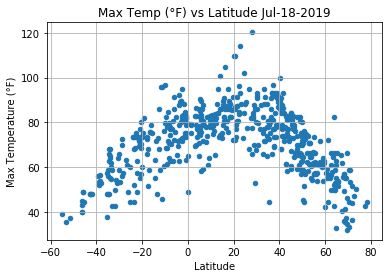

In [24]:
df.plot('Latitude', 'Max Temperature (°F)', 'Scatter', title = f'Max Temp (°F) vs Latitude {date_today}', grid = True).get_figure().savefig("lat-temp.png")

#### Latitude vs. Humidity Plot

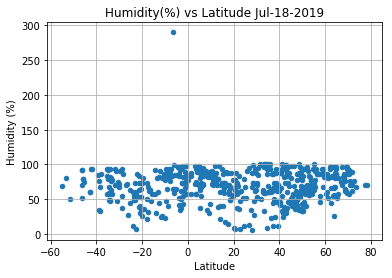

In [19]:
df.plot('Latitude', 'Humidity (%)', 'Scatter', title = f'Humidity(%) vs Latitude {date_today}', grid = True).get_figure().savefig("lat-hum.png")

#### Latitude vs. Cloudiness Plot

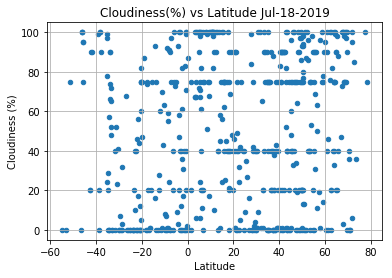

In [20]:
df.plot('Latitude', 'Cloudiness (%)', 'Scatter', title = f'Cloudiness(%) vs Latitude {date_today}', grid = True).get_figure().savefig("lat-cloud.png")

#### Latitude vs. Wind Speed Plot

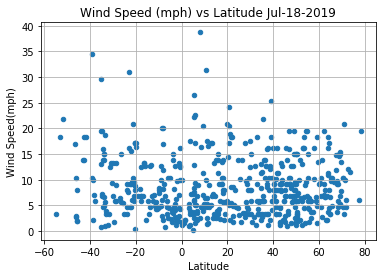

In [21]:
df.plot('Latitude', 'Wind Speed(mph)', 'Scatter', title = f'Wind Speed (mph) vs Latitude {date_today}', grid = True).get_figure().savefig("lat-wind.png")